# Notebook de nettoyage

**Objectifs**
- Repérer les variables et instantes du jeu de consistantes
- Automatiser notre traitement des données
- Mettre ce jeu de données dans un format exploitable pour une analyse exploratoire


## Mise en place

Modules et paramétrages utilisés le long de ce notebook.

In [0]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="white")
sns.set_palette("Set2")
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Téléchargement et décompression des données

In [0]:
DATA_URL = 'https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/\
courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip'
!wget {DATA_URL}

FILE_NAME = DATA_URL.split('/')[-1]
!unzip {FILE_NAME}

--2019-02-02 17:58:37--  https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 54.231.131.51
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|54.231.131.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88117814 (84M) [application/x-www-form-urlencoded]
Saving to: ‘fr.openfoodfacts.org.products.csv.zip’

fr.openfoodfacts.or 100%[===================>]  84.04M  75.3MB/s    in 1.1s    

2019-02-02 17:58:44 (75.3 MB/s) - ‘fr.openfoodfacts.org.products.csv.zip’ saved [88117814/88117814]

Archive:  fr.openfoodfacts.org.products.csv.zip
  inflating: fr.openfoodfacts.org.products.csv  
   creating: __MACOSX/
  inflating: __MACOSX/._fr.openfoodfacts.org.products.csv  


Chargement du fichier aux valeurs séparées par tabulation, et affichage de ses premières lignes

In [0]:
csv_files = !ls fr*.csv

# low_memory: charger fichier malgré incohérence des types des colonnes
data = pd.read_csv(csv_files[0], sep='\t', low_memory=False)
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Informations sommaires sur la base de données

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


## Traitement des données manquantes

Quelle est la part d'éléments manquants et non manquants dans nos données brutes, en tout?

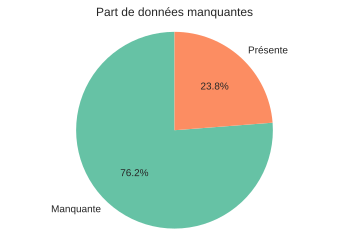

In [0]:
labels = 'Manquante', 'Présente'

fig, ax = plt.subplots()
sizes = data.isnull().sum().sum(), data.notnull().sum().sum()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')  # s'assurer que le graphe soit un cercle
ax.set_title('Part de données manquantes')

plt.show()

Quelle est la part d'éléments manquants et non manquants pour chaque variable? Créeons un dataframe contenant cette information.

In [0]:
presence_columns = pd.DataFrame(
    data=(data.notnull()
          .sum(axis=0)
          .divide(len(data)) # normaliser
          .multiply(100)
          .sort_values()),
    columns=['% present'])

presence_columns.head(n=10)

,% present
melissic-acid_100g,0.0
chlorophyl_100g,0.0
nervonic-acid_100g,0.0
erucic-acid_100g,0.0
mead-acid_100g,0.0
elaidic-acid_100g,0.0
glycemic-index_100g,0.0
cerotic-acid_100g,0.0
lignoceric-acid_100g,0.0
caproic-acid_100g,0.0


Représentons ce dataframe sous forme graphique.

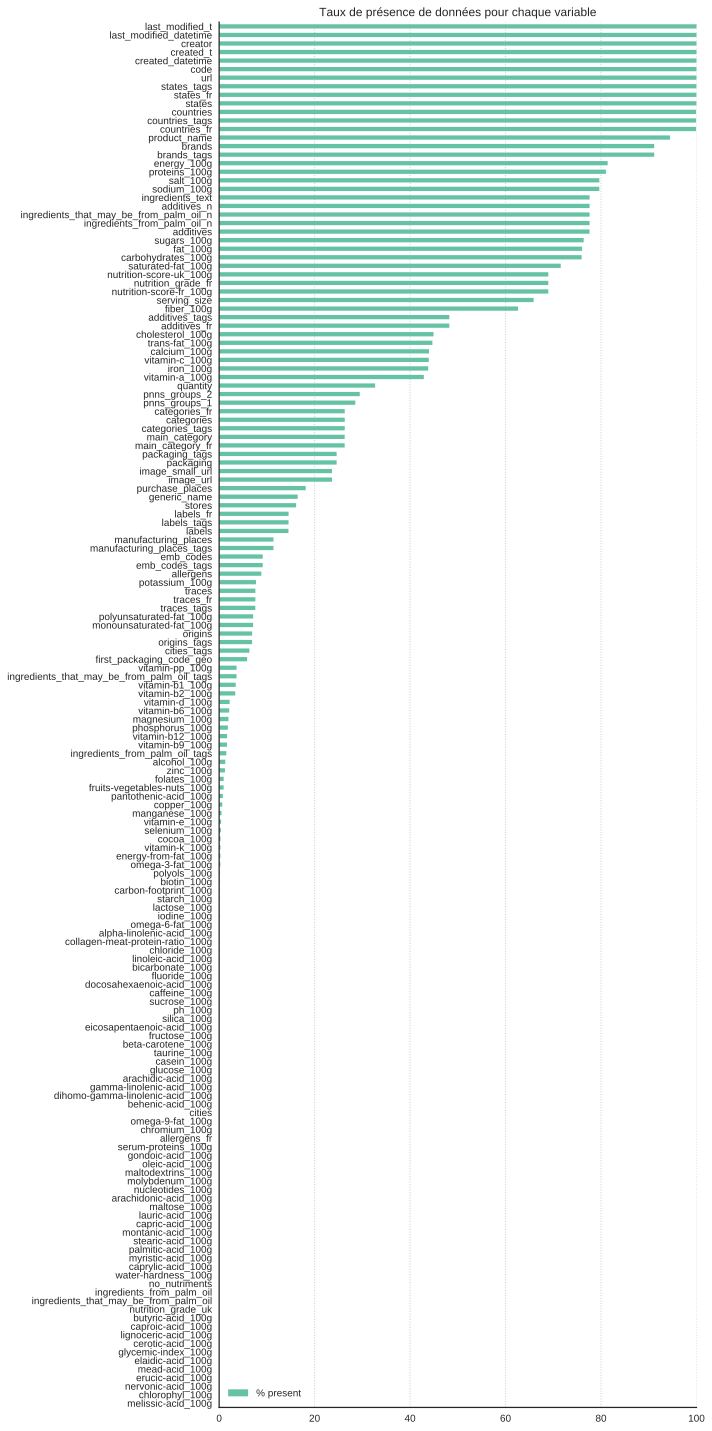

In [0]:
presence_columns.plot(kind='barh', figsize=(10, 20), xlim=(0, 100), 
                      title='Taux de présence de données pour chaque variable')
plt.grid(True, axis='x', linestyle=':')
plt.tight_layout()
sns.despine();

*Sanity check*: vérifions que `NA` n'est pas un encodage pour la valeur 0 dans les attributs nutritionnels, en regardant si cette valeur existe déjà dans leur distribution.

In [0]:
# On effectue la verification dans les colonnes avec au moins 1% de présence
# des données
mask = presence_columns.loc[presence_columns['% present'] >= 1]

(data.loc[:, mask.index].filter(like='_100g') == 0).sum(axis=0).to_frame()

,0
zinc_100g,73
alcohol_100g,1555
vitamin-b9_100g,13
vitamin-b12_100g,107
phosphorus_100g,41
magnesium_100g,76
vitamin-b6_100g,139
vitamin-d_100g,345
vitamin-b2_100g,361
vitamin-b1_100g,328


Compte-tenu de la grande présence de valeurs manquantes dans notre dataset, on choisit de supprimer toutes les variables avec moins de 5% de présence.

Étant donné le nombre important de lignes dans notre dataset, on suppose qu'on obtiendra une distribution convenable pour les attributs restants, même avec ce faible pourcentage de présence.

In [0]:
mask = presence_columns.loc[presence_columns['% present'] >= 5]
cleaned_1 = data.loc[:, mask.index] 

cleaned_1.shape, cleaned_1.columns

((320772, 75),
 Index(['first_packaging_code_geo', 'cities_tags', 'origins_tags', 'origins',
        'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'traces_tags',
        'traces_fr', 'traces', 'potassium_100g', 'allergens', 'emb_codes_tags',
        'emb_codes', 'manufacturing_places_tags', 'manufacturing_places',
        'labels', 'labels_tags', 'labels_fr', 'stores', 'generic_name',
        'purchase_places', 'image_url', 'image_small_url', 'packaging',
        'packaging_tags', 'main_category_fr', 'main_category',
        'categories_tags', 'categories', 'categories_fr', 'pnns_groups_1',
        'pnns_groups_2', 'quantity', 'vitamin-a_100g', 'iron_100g',
        'vitamin-c_100g', 'calcium_100g', 'trans-fat_100g', 'cholesterol_100g',
        'additives_fr', 'additives_tags', 'fiber_100g', 'serving_size',
        'nutrition-score-fr_100g', 'nutrition_grade_fr',
        'nutrition-score-uk_100g', 'saturated-fat_100g', 'carbohydrates_100g',
        'fat_100g', 'sugars_100g', '

Parmi les attributs restants, beaucoup ne sont pas utiles pour déterminer l'apport nutritionnel d'un aliment:
- dans un premier temps les variables d'informations générales (géographiques, commerciales...). De cette catégorie, nous ne conservons que la variable `code` qui servira de clé primaire dans notre base de données, si le client souhaite avoir accès à des informations supprimées pour un produit en particulier.
- puis des variables inutilisables qui contiennent généralement des listes d'ingrédients très diverses, ce qui créé des attributs catégoriels avec beaucoup de modalités et ne permet pas de faire ressortir des *patterns*
- et enfin des variables inutiles qui contiennent la même information ou moins d'information que des variables que nous gardons.


Après avoir supprimé ces données, regardons les attributs qui nous restent.

In [0]:
generales = ['first_packaging_code_geo', 'cities_tags', 'origins_tags', 
             'origins', 'manufacturing_places_tags', 'manufacturing_places', 
             'brands_tags', 'brands', 'product_name', 'countries_fr', 
             'countries_tags', 'countries', 'states', 'states_fr', 
             'states_tags', 'url', 'created_datetime', 'created_t', 'creator', 
             'last_modified_datetime', 'last_modified_t', 'emb_codes_tags', 
             'emb_codes', 'stores', 'generic_name', 'purchase_places', 
             'image_url', 'image_small_url', 'packaging_tags', 'packaging', 
             'labels', 'labels_tags', 'labels_fr']

inutiles = ['traces_tags', 'traces_fr', 'traces', 'allergens', 
            'ingredients_text', 'quantity', 'serving_size']

redondantes = ['main_category_fr', 'main_category', 'categories_tags', 
               'categories', 'categories_fr', 'additives_fr', 'additives_tags', 
               'additives', 'ingredients_that_may_be_from_palm_oil_n',
               'pnns_groups_2']


cleaned_2 = (cleaned_1.drop(generales + inutiles + redondantes, axis=1)
             .set_index('code'))
cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320772 entries, 0000000003087 to 999990026839
Data columns (total 24 columns):
monounsaturated-fat_100g       22823 non-null float64
polyunsaturated-fat_100g       22859 non-null float64
potassium_100g                 24748 non-null float64
pnns_groups_1                  91513 non-null object
vitamin-a_100g                 137554 non-null float64
iron_100g                      140462 non-null float64
vitamin-c_100g                 140867 non-null float64
calcium_100g                   141050 non-null float64
trans-fat_100g                 143298 non-null float64
cholesterol_100g               144090 non-null float64
fiber_100g                     200886 non-null float64
nutrition-score-fr_100g        221210 non-null float64
nutrition_grade_fr             221210 non-null object
nutrition-score-uk_100g        221210 non-null float64
saturated-fat_100g             229554 non-null float64
carbohydrates_100g             243588 non-null float64
fa

## Traitement des données abbérantes

Observons la distribution des variables catégoriques pour y réperer d'éventuelles anomalies

In [0]:
cleaned_2['nutrition_grade_fr'].value_counts().to_frame()

,nutrition_grade_fr
d,62763
c,45538
e,43030
a,35634
b,34245


In [0]:
cleaned_2['pnns_groups_1'].value_counts().to_frame()

,pnns_groups_1
unknown,22624
Sugary snacks,12368
Beverages,9033
Milk and dairy products,8825
Cereals and potatoes,8442
Fish Meat Eggs,8041
Composite foods,6747
Fruits and vegetables,5908
Fat and sauces,5216
Salty snacks,2809


Pour la variable `pnns_groups_1`, nous observons des catégories redondantes que nous allons uniformiser, et une catégorie inutile (`unknown`) que nous considérons comme un signalement de valeur manquante.

In [0]:
minimize_all = lambda x: '-'.join(x.lower().split())
cleaned_2['pnns_groups_1'] = \
  (cleaned_2['pnns_groups_1'].map(minimize_all, na_action='ignore')
   .replace(['unknown'], [np.nan]))

cleaned_2['pnns_groups_1'].value_counts().to_frame()

,pnns_groups_1
sugary-snacks,12864
beverages,9033
milk-and-dairy-products,8825
cereals-and-potatoes,8458
fish-meat-eggs,8041
fruits-and-vegetables,6895
composite-foods,6747
fat-and-sauces,5216
salty-snacks,2810


Regardons de plus près les distributions des variables numériques discrètes

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


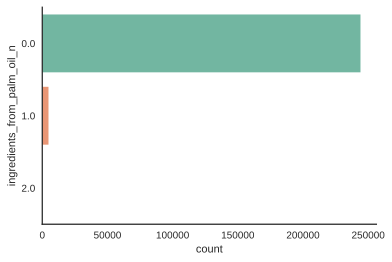

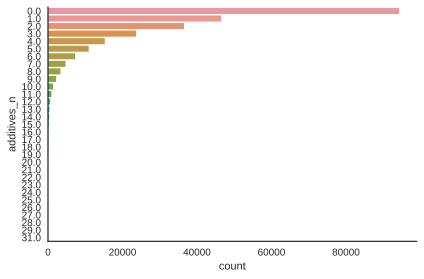

In [0]:
discretes = cleaned_2.filter(like='_n').columns
for col in discretes:
    plt.figure()
    sns.countplot(y=col, data=cleaned_2)
    sns.despine()
plt.tight_layout();

Passons maintenant au sous-ensemble des attributs numériques continus, sauf attributs cibles.
Profitons-en pour y supprimer les valeurs négatives qui n'ont pas de sens.

In [0]:
labels = ['nutrition-score-fr_100g', 'nutrition-score-uk_100g']
num_columns = (cleaned_2.select_dtypes(include=[np.number])
               .drop(discretes.tolist() + labels, axis=1)
               .columns)
num_data = cleaned_2.loc[:, num_columns]

num_data[num_data < 0] = np.nan

Conservons certaines caractéristiques de positions sur les données avant suppression des valeurs aberrantes

In [0]:
def quartiles(df, value_name):
    """
    Pour une selection de variables numériques données, on calcule plusieurs 
    caractéristiques de position.
    Puis on applique un 'anti-pivot' sur la dataframe resultante pour obtenir 
    sur chaque ligne une valeur et ses identifiants (variable, caractéristique)
    """

    return (df.quantile([0.25, 0.5, 0.75]).transpose()
            .reset_index()
            .rename(columns={'index': 'Variable', 0.25: 'Q1', 0.5: 'Q2',
                             0.75: 'Q3'})
            .pipe(pd.melt, id_vars=['Variable'], var_name='Quartile', 
                  value_name=value_name)
            )


Avant = quartiles(num_data, 'Brute')

Tout d'abord observons la distribution de leurs valeurs grâce à des boxplots

In [0]:
def display_boxplots(num_data, title):
    f, axarr = plt.subplots(6, 3, figsize=(10, 20))
    i, j = 0, 0
    plt.suptitle(title, y=1.01, fontsize=15); 
    
    for col in num_columns:
        sns.boxplot(y=col, data=num_data, ax = axarr[i, j])
        j += 1
        if j > 2:
            j = 0
            i += 1

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


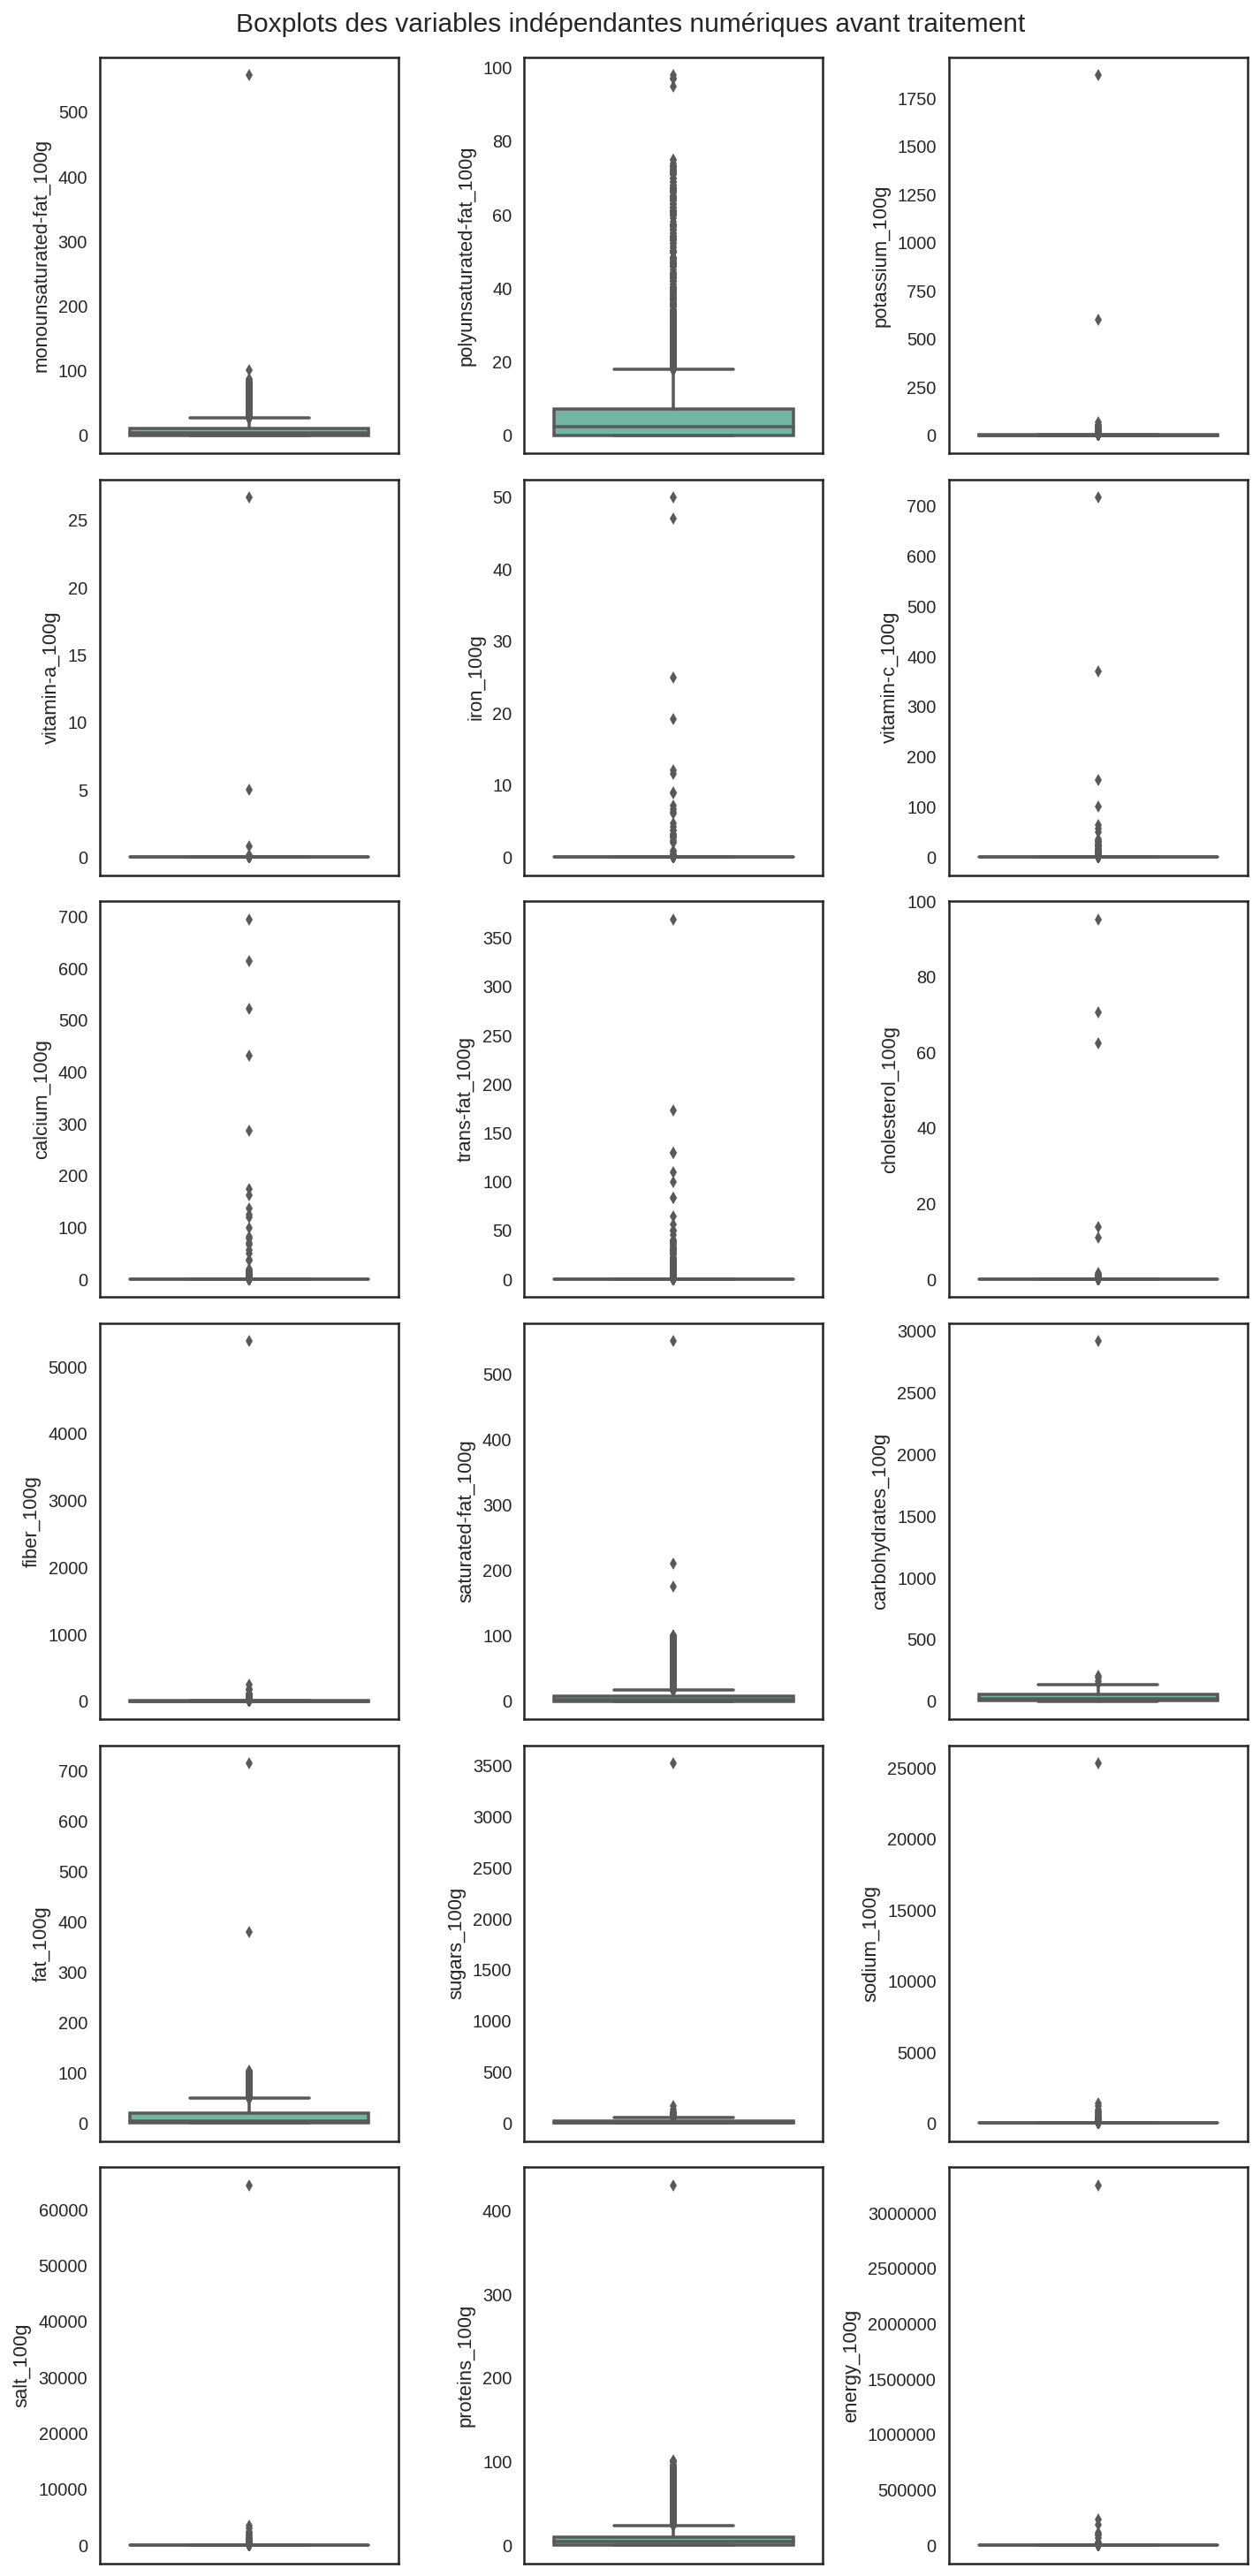

In [0]:
%config InlineBackend.figure_format = 'retina'
display_boxplots(num_data, 'Boxplots des variables indépendantes numériques avant traitement')
plt.tight_layout();

Nous allons maintenant supprimer les *outliers* remarqués (en replaçant ces valeurs par des valeurs manquantes).

Nous proposons une première méthode qui supprime les instances si leur distance - standardisée - à la moyenne dépasse un certain seuil. Regardons combien de mesures seraient concernées par variable.

In [0]:
z_threshold = 3

mask = (num_data.transform(lambda x: (x - x.mean()) / x.std())
        .applymap(lambda x: np.abs(x) > z_threshold))
mask.sum()

monounsaturated-fat_100g    1156
polyunsaturated-fat_100g     682
potassium_100g                 7
vitamin-a_100g                 3
iron_100g                     27
vitamin-c_100g                31
calcium_100g                  29
trans-fat_100g               556
cholesterol_100g               8
fiber_100g                   269
saturated-fat_100g          2589
carbohydrates_100g             7
fat_100g                    5250
sugars_100g                 3445
sodium_100g                   28
salt_100g                     28
proteins_100g               3390
energy_100g                    9
dtype: int64

Appliquons le traitement et observons son résultat en affichant de nouveaux les boxplots des variables concernées.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


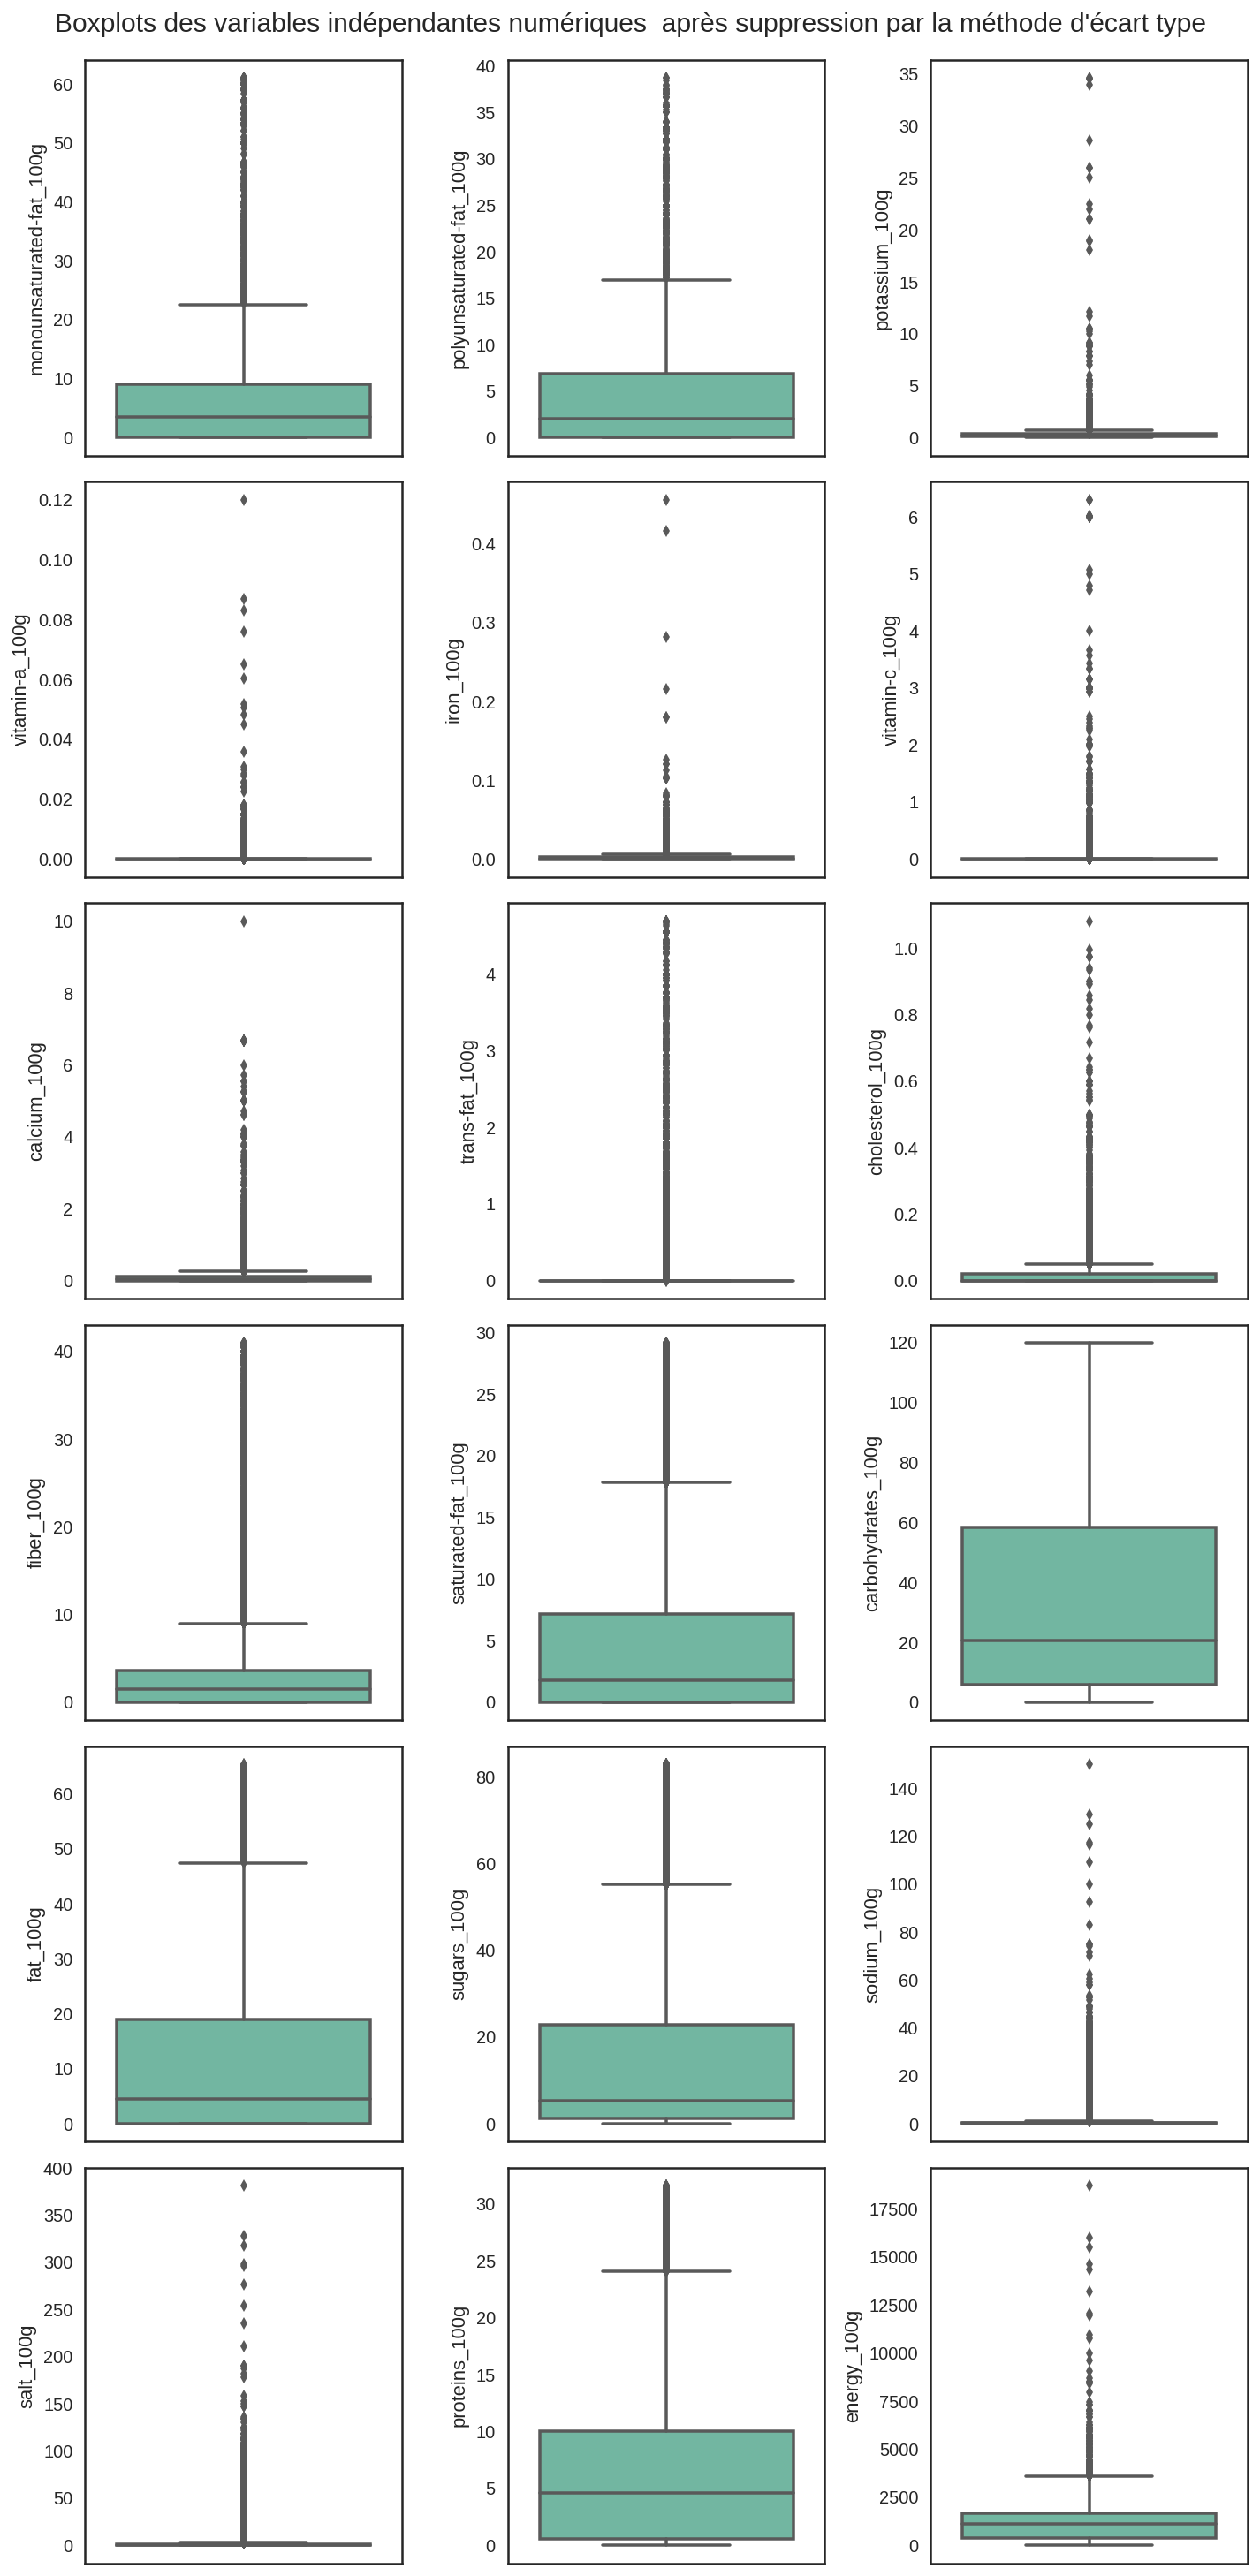

In [0]:
for col in num_columns:
    num_data.loc[mask[col], col] = np.nan 

display_boxplots(num_data, "Boxplots des variables indépendantes numériques\
  après suppression par la méthode d'écart type")
plt.tight_layout()

Bien qu'ayant supprimé les valeurs les plus extrêmes, nous observons que cette méthode a laissé beaucoup d'*outliers* présents.

Nous en proposons une seconde qui supprime par variable les mesures qui se trouvent hors des *moustaches* des boxplots, c'est à dire à une certaine distance au-dessous du 1e quartile ou au-delà du 3e quartile de chaque variable. Affichons combien de mesures seraient concernées par cette méthode.

In [0]:
# Effacer le premier traitement
num_data = cleaned_2.loc[:, num_columns]
num_data[num_data < 0] = np.nan


def outlier_detection(col, ratio):
    """Pour un variable donné, labeliser comme outlier une valeur qui est:
    - inférieure à q1 - ratio*iqr
    - supérieure à q3 + ratio*iqr"""
    iqr = col.quantile(0.75) - col.quantile(0.25)
    return ~col.between(
        col.quantile(0.25) - ratio*iqr,
        col.quantile(0.75) + ratio*iqr)


mask_2 = num_data.transform(outlier_detection, ratio=2) &\
  cleaned_2.loc[:,num_columns].notnull()
mask_2.sum()

monounsaturated-fat_100g     1979
polyunsaturated-fat_100g     1718
potassium_100g               1685
vitamin-a_100g              11945
iron_100g                    4642
vitamin-c_100g              20461
calcium_100g                 9806
trans-fat_100g               3001
cholesterol_100g            17159
fiber_100g                   8032
saturated-fat_100g           8682
carbohydrates_100g              4
fat_100g                     5767
sugars_100g                  8582
sodium_100g                 13124
salt_100g                   13125
proteins_100g                4367
energy_100g                   122
dtype: int64

Appliquons le traitement et observons le resultat avec la même technique de visualisation

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


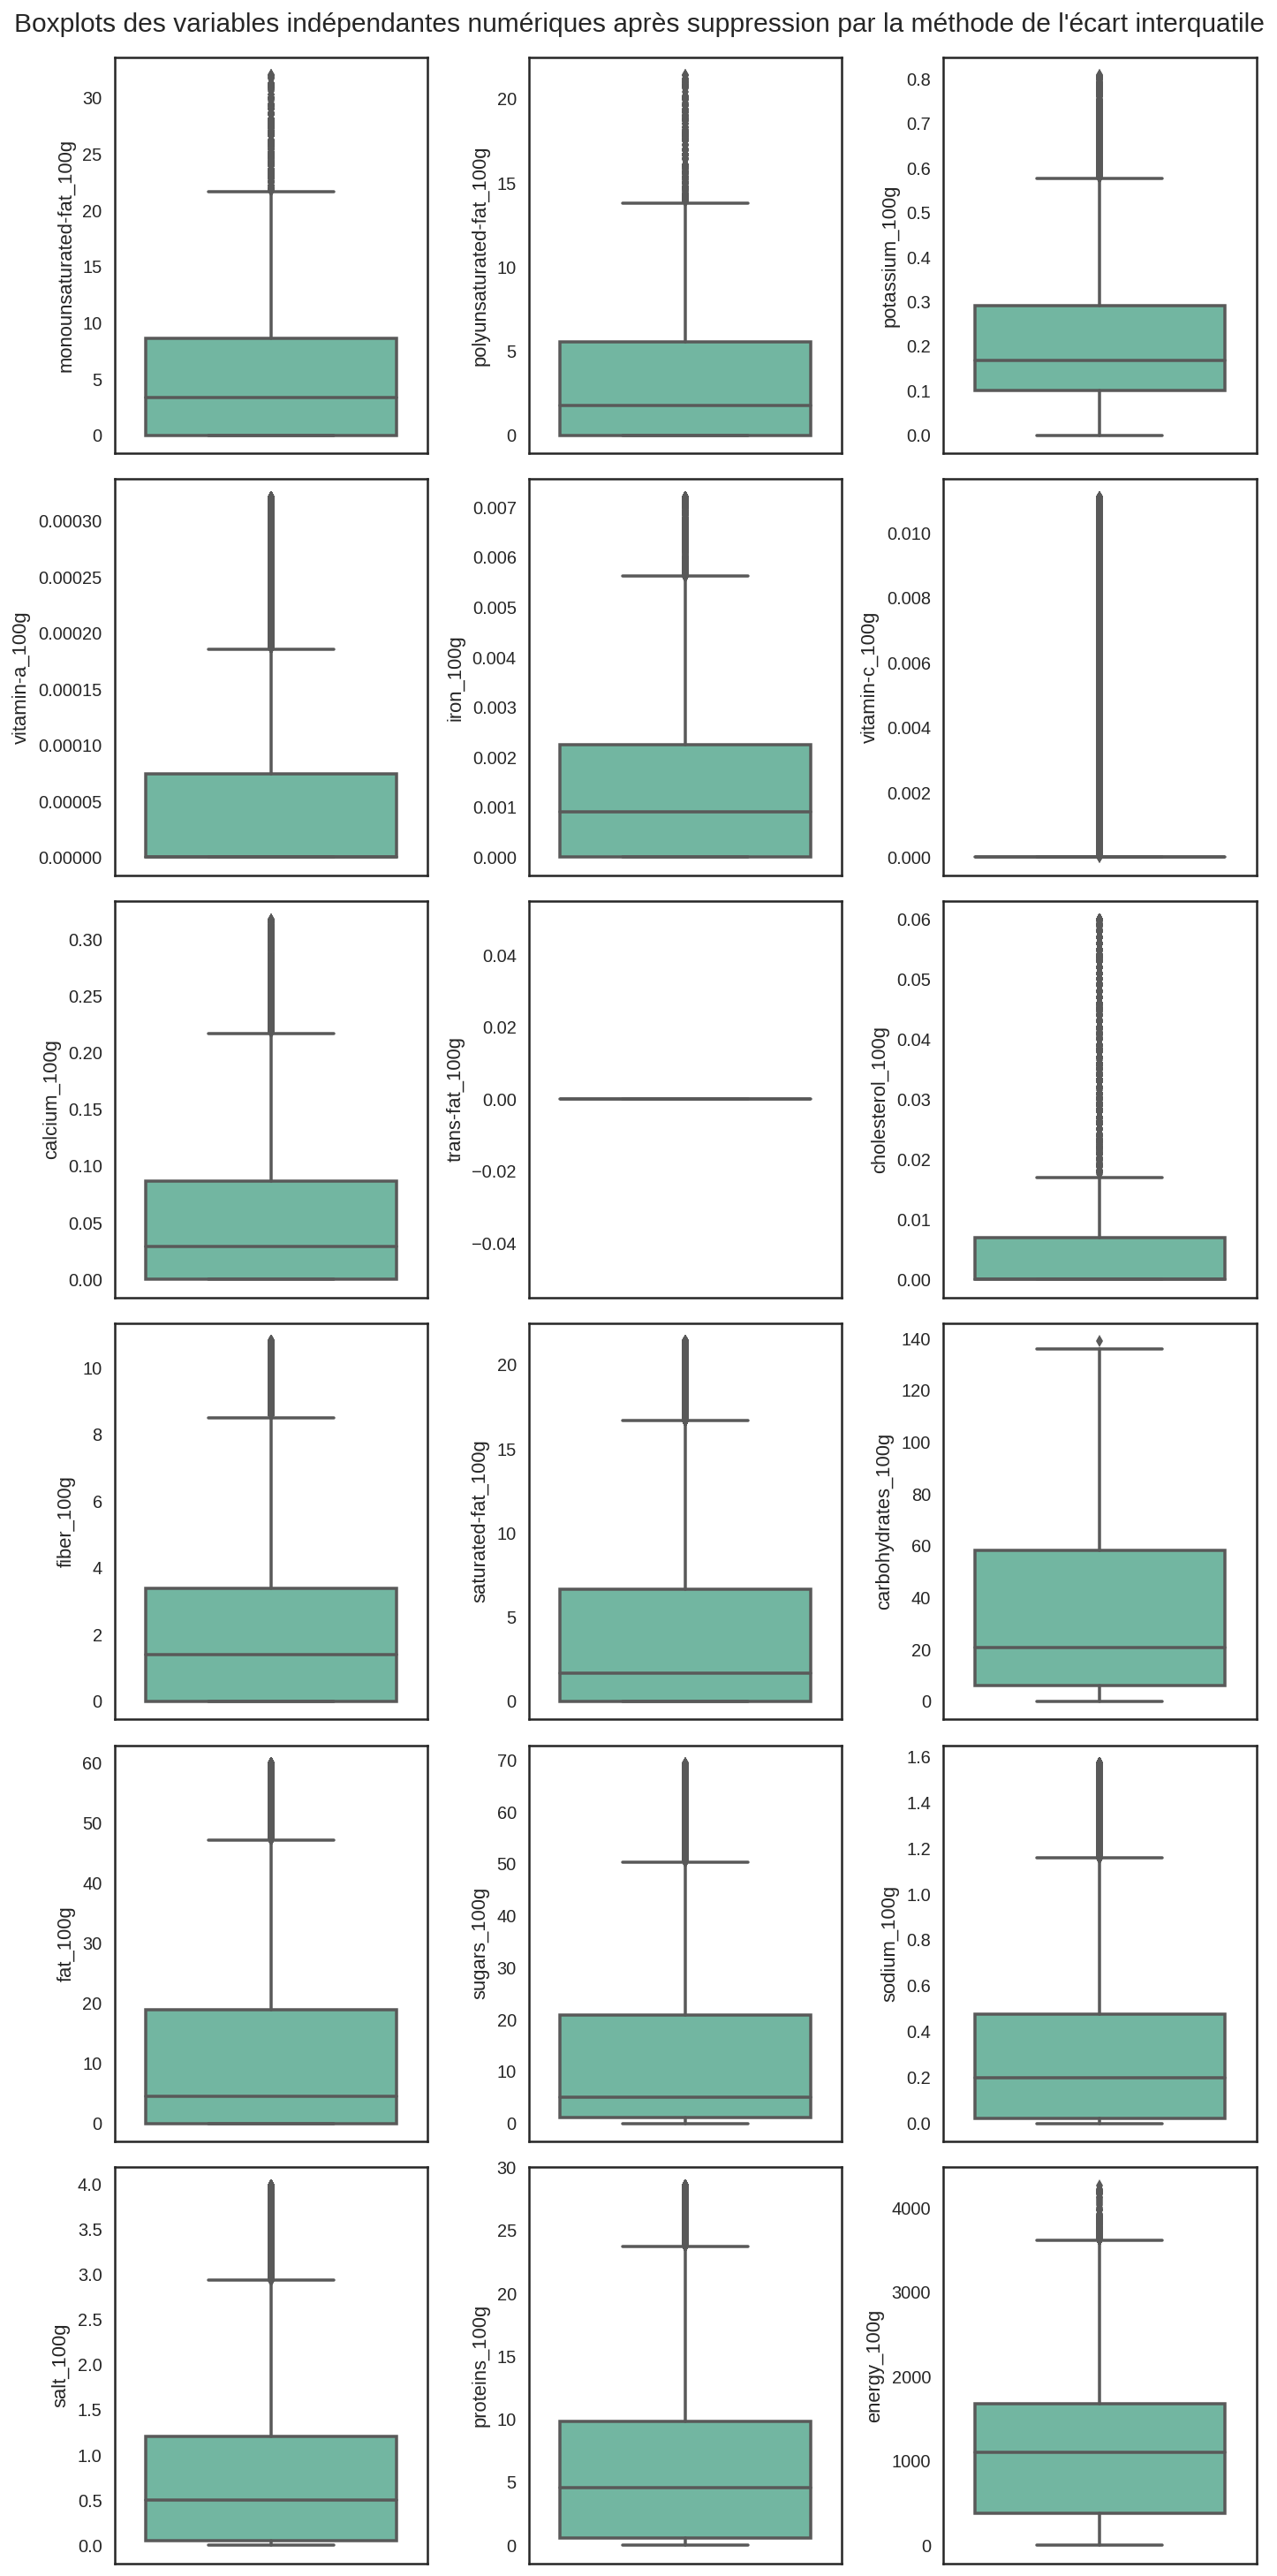

In [0]:
for col in num_columns:
    num_data.loc[mask_2[col], col] = np.nan 

display_boxplots(num_data, "Boxplots des variables indépendantes numériques après suppression par la méthode de l'écart interquatile")
plt.tight_layout()

Le 2nd traitement permet d'obtenir des distributions plus régulières. 

Calculons à nouveau les mêmes caractéristiques positionnelles, sur nos variables nettoyées cette fois-ci. Comparons ces caractéristiques avant et après traitement afin de nous assurer que nos distributions n'ont pas été trop biasées.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


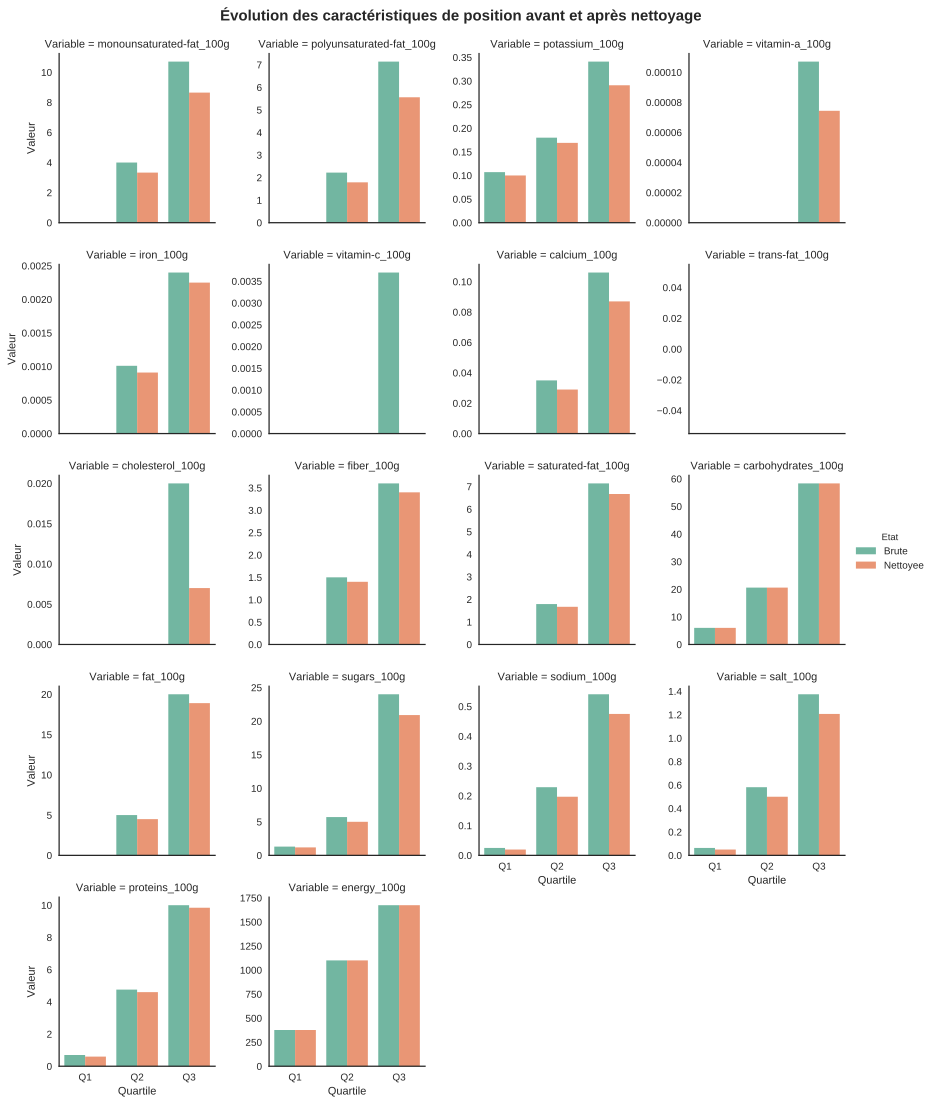

In [0]:
Apres = quartiles(num_data, 'Nettoyee')

g = (pd.merge(Avant, Apres, on=['Variable', 'Quartile'])
     .pipe(pd.melt, id_vars=['Variable', 'Quartile'], var_name=['Etat'], value_name='Valeur')
   .pipe((sns.factorplot, 'data'), x='Quartile', y='Valeur', hue='Etat', col='Variable', 
           kind='bar', ci='None', sharey=False, col_wrap=4, legend=True, size=3)
    )

%config InlineBackend.figure_format = 'svg'
# plt.subplots_adjust(top=0.2)
g.fig.suptitle('Évolution des caractéristiques de position avant et après nettoyage', y=1.02, size=15, weight='bold');

Après ce traitement la variable `trans-fat_100g` est constamment à valeur nulle, et `vitamin-c_100g` le devient quasiment . Avant traitement d'outliers, elles avaient déjà un grand nombre de valeurs nulles. Nous décidons de les supprimer.

In [0]:
print('Ratio nombres de valeurs nulles/nombres de valeurs non-manquantes')

for var in ['trans-fat_100g', 'vitamin-c_100g']:
  ratio = (cleaned_2[var] == 0).sum() / cleaned_2[var].notnull().sum()
  print(f"\t{var}: {ratio*100:.2f} %")

Ratio nombres de valeurs nulles/nombres de valeurs non-manquantes
	trans-fat_100g: 97.91 %
	vitamin-c_100g: 64.24 %


Nous ajoutons tous ces changements dans le dataframe.

In [0]:
cleaned_3 = cleaned_2.copy()
cleaned_3.loc[:, num_columns.tolist()] = num_data
cleaned_3.drop(['trans-fat_100g', 'vitamin-c_100g'], axis=1, inplace=True)

## Finitions

Calculons, par instance, le nombre d'attributs à valeurs non manquantes. Et affichons la distribution de cette nouvelle valeur avec un graphique à fréquences cumulées.

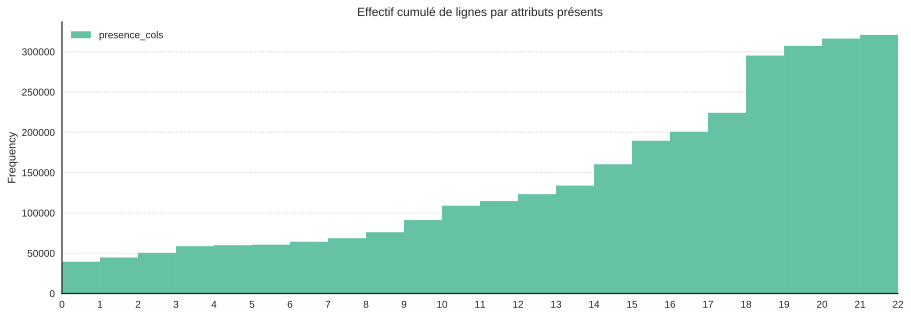

In [0]:
presence_lignes = pd.DataFrame(
    data=(cleaned_3.notnull()
          .sum(axis=1)),
    columns=['presence_cols']
)

n_col = cleaned_3.shape[1]
presence_lignes.plot(kind='hist', bins=n_col, cumulative=True, 
                     xticks=np.arange(0, n_col+1, 1), xlim=(0, n_col), figsize=(15, 5), 
                     title='Effectif cumulé de lignes par attributs présents');
plt.grid(False, axis='x')
plt.grid(True, axis='y', linestyle=':')
sns.despine();

Nous ne gardons pas les lignes qui contiennent que des valeurs manquantes.

In [0]:
mask = presence_lignes['presence_cols'] > 0
cleaned = cleaned_3.loc[mask, :]

cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281333 entries, 0000000004530 to 999990026839
Data columns (total 22 columns):
monounsaturated-fat_100g       20844 non-null float64
polyunsaturated-fat_100g       21141 non-null float64
potassium_100g                 23063 non-null float64
pnns_groups_1                  68889 non-null object
vitamin-a_100g                 125609 non-null float64
iron_100g                      135820 non-null float64
calcium_100g                   131244 non-null float64
cholesterol_100g               126931 non-null float64
fiber_100g                     192854 non-null float64
nutrition-score-fr_100g        221210 non-null float64
nutrition_grade_fr             221210 non-null object
nutrition-score-uk_100g        221210 non-null float64
saturated-fat_100g             220872 non-null float64
carbohydrates_100g             243584 non-null float64
fat_100g                       238124 non-null float64
sugars_100g                    236389 non-null float64
in

Comparons la proportion de valeurs manquantes dans notre jeu de données avant et après nettoyage.

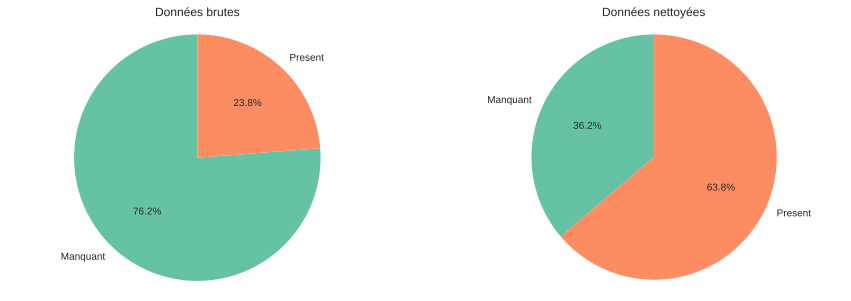

In [0]:
labels = 'Manquant', 'Present'

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sizes = data.isnull().sum().sum(), data.notnull().sum().sum()
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax[0].axis('equal')
ax[0].set_title("Données brutes")

sizes = cleaned.isnull().sum().sum(), cleaned.notnull().sum().sum()
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax[1].axis('equal')
ax[1].set_title("Données nettoyées")

plt.show()

Apportons quelques derniers changements sur l'organisation de notre dataframe

In [0]:
# ordonner les colonnes: mettre les variables les variables cibles à la fin
columns = cleaned.columns.values.tolist()
targets = ['nutrition-score-fr_100g', 'nutrition-score-uk_100g', 
           'nutrition_grade_fr']
for t in targets:
    columns.remove(t)
    columns.append(t)
    
# appliquer ordre et changer les caractères séparateurs pour consistence
cleaned = (cleaned.reindex(columns=columns)
           .rename(columns= lambda x: x.replace('-', '_')))

Nous pouvons exporter notre base de données nettoyée afin de commencer l'exploration dans un second notebook.

In [0]:
OUTPUT_FILE = 'cleaned_data.csv' 
cleaned.to_csv(OUTPUT_FILE)

In [0]:
## Conserver le fichier obtenu sur mon drive
# from google.colab import drive
# drive.mount('/content/drive')
# !cp {OUTPUT_FILE} '/content/drive/My Drive/Projets Formation/Projet 2/'